In [ ]:
import sys,os
is_this_colab = 'google.colab' in sys.modules
if is_this_colab:
    !git clone https://github.com/jsmaskeen/finite-automata.git
    %cd finite-automata
else:
    os.environ["PATH"] += os.pathsep + r"C:\Program Files\Graphviz\bin"
    %cd ..
    

In [2]:
from src.fa.nfa import NFA
from src.fa.dfa import DFA
from src.utils.visualizer import Visualizer as vis

## NFA Example

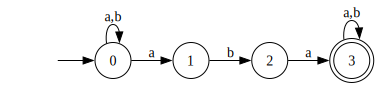

In [3]:

nfa = NFA()
nfa.setSigma({'a', 'b'})
for s in [str(i) for i in range(4)]:
    nfa.addState(s)
nfa.setInitial('0')
nfa.addFinal('3')
nfa.addTransition('0', 'a', '0')
nfa.addTransition('0', 'b', '0')
nfa.addTransition('0', 'a', '1')
nfa.addTransition('1', 'b', '2')
nfa.addTransition('2', 'a', '3')
nfa.addTransition('3', 'a', '3')
nfa.addTransition('3', 'b', '3')

vis.to_graphviz(nfa)

Original NFA:
NFA(
  States: {'q0', 'p1', 'q1', 'q2', 'p2', 'p0'}
  Alphabet: {'0', '1'}
  Initial States: {'q0', 'p0'}
  Final States: {'p2', 'q2'}
  Transitions: 
p0 -> {'0': {p1}}
p1 -> {'1': {p2}}
q0 -> {'1': {q1}}
q1 -> {'0': {q2}}
)


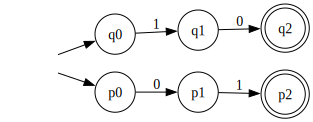

In [4]:
big_nfa = NFA()
big_nfa.setSigma({'0', '1'})
big_nfa.setInitial({'p0', 'q0'})
big_nfa.addFinal('p2')  
big_nfa.addFinal('q2')  

big_nfa.addTransition('p0', '0', 'p1')
big_nfa.addTransition('p1', '1', 'p2')

big_nfa.addTransition('q0', '1', 'q1')
big_nfa.addTransition('q1', '0', 'q2')

print("Original NFA:")
print(big_nfa)
vis.to_graphviz(big_nfa)


Determinized DFA:
DFA(
  States: {0, 1, 2, 3, 4, 5}
  Alphabet: {'0', '1'}
  Initial State: 0
  Final States: {3, 4}
  Transitions: {(0, '0'): 1, (0, '1'): 2, (1, '1'): 3, (2, '0'): 4, (5, '0'): 5, (5, '1'): 5, (1, '0'): 5, (2, '1'): 5, (3, '0'): 5, (3, '1'): 5, (4, '0'): 5, (4, '1'): 5}
)


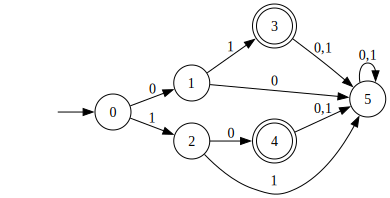

In [5]:
big_dfa = big_nfa.toDFA()
print("\nDeterminized DFA:")
print(big_dfa)
vis.to_graphviz(big_dfa)


Minimized DFA:
DFA(
  States: {'q0', 'q3', 'q1', 'q2', 'q4'}
  Alphabet: {'0', '1'}
  Initial State: q0
  Final States: {'q3'}
  Transitions: {('q0', '0'): 'q1', ('q0', '1'): 'q2', ('q1', '0'): 'q4', ('q1', '1'): 'q3', ('q2', '0'): 'q3', ('q2', '1'): 'q4', ('q3', '0'): 'q4', ('q3', '1'): 'q4', ('q4', '0'): 'q4', ('q4', '1'): 'q4'}
)


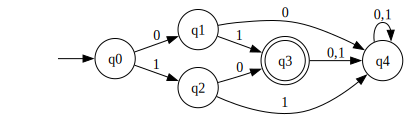

In [6]:
min_big_dfa:DFA = big_dfa.minimal()
print("\nMinimized DFA:")
print(min_big_dfa)
vis.to_graphviz(min_big_dfa)


Reversed NFA:
NFA(
  States: {'q0', 'p1', 'q1', 'q2', 'p2', 'p0'}
  Alphabet: {'0', '1'}
  Initial States: {'p2', 'q2'}
  Final States: {'q0', 'p0'}
  Transitions: 
p1 -> {'0': {p0}}
p2 -> {'1': {p1}}
q1 -> {'1': {q0}}
q2 -> {'0': {q1}}
)


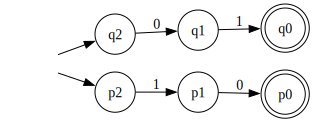

In [7]:
rev_nfa = big_nfa.reversal()
print("\nReversed NFA:")
print(rev_nfa)
vis.to_graphviz(rev_nfa)

## DFA Example


Original Large DFA (#0%3=0 and #1%2=1):


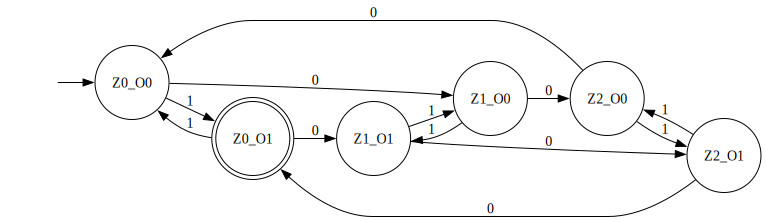

In [8]:
# DFA recognizing binary strings where #0 mod 3 = 0 and #1 mod 2 = 1
large_dfa = DFA()
large_dfa.setSigma({'0', '1'})
states = ['Z0_O0', 'Z0_O1', 'Z1_O0', 'Z1_O1', 'Z2_O0', 'Z2_O1']
for s in states:
    large_dfa.addState(s)

large_dfa.setInitial('Z0_O0')
large_dfa.addFinal('Z0_O1')

for s in states:
    z_mod = int(s[1])  
    o_mod = int(s[-1])  
    nz = (z_mod + 1) % 3
    no = o_mod
    dest0 = f"Z{nz}_O{no}"
    large_dfa.addTransition(s, '0', dest0)
    nz = z_mod
    no = (o_mod + 1) % 2
    dest1 = f"Z{nz}_O{no}"
    large_dfa.addTransition(s, '1', dest1)

print("Original Large DFA (#0%3=0 and #1%2=1):")
vis.to_graphviz(large_dfa)


Minimized Large DFA:


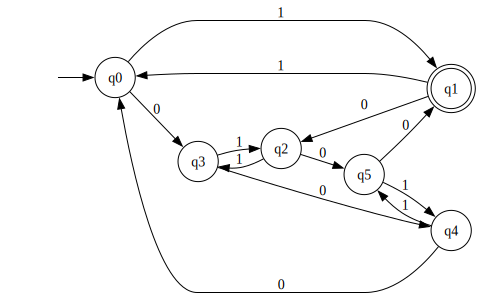

In [9]:
min_large_dfa = large_dfa.minimal()
print("\nMinimized Large DFA:")
vis.to_graphviz(min_large_dfa)

In [10]:
print(f"\nIs minimized DFA isomorphic to itself? {min_large_dfa.is_isomorphic_to(min_large_dfa)}")


Is minimized DFA isomorphic to itself? True
